In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jyin1\AppData\Local\Temp\ipykernel_30448\2202865298.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  bars = sns.barplot(data=data, x='year', y='RMB in billions', ax=ax1, hue='type', palette=colours)


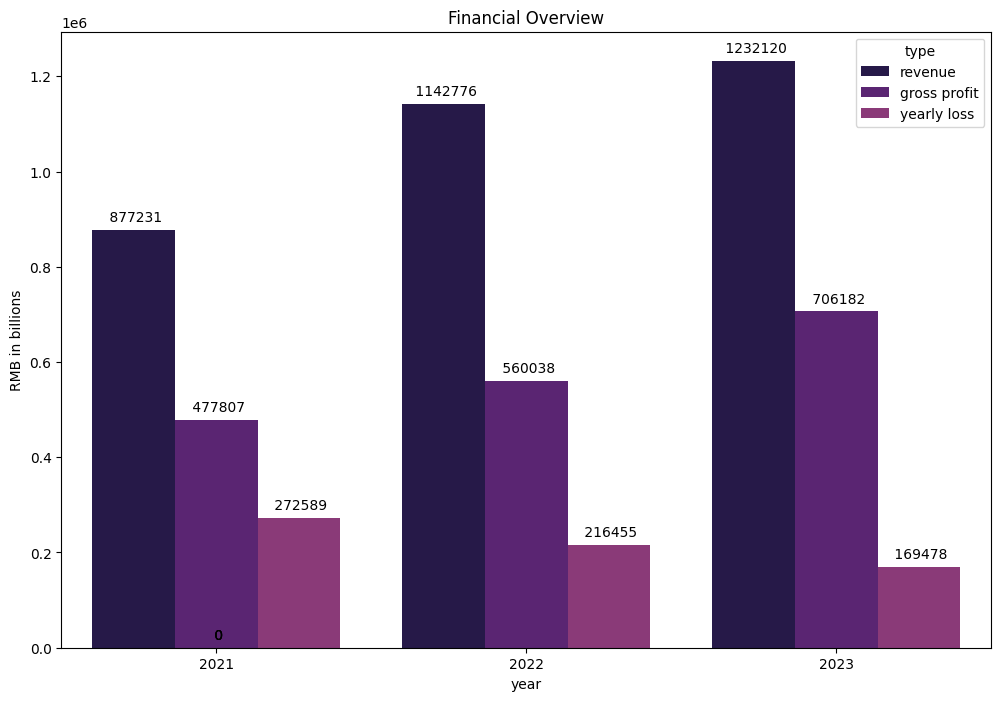

In [31]:
data = pd.read_excel('financial_overview.xlsx')

fig, ax1 = plt.subplots(figsize=(12, 8))
colours = sns.color_palette("magma")
bars = sns.barplot(data=data, x='year', y='RMB in billions', ax=ax1, hue='type', palette=colours)

# annotate with data labels
for bar in bars.patches:
    ax1.annotate(f'{bar.get_height(): .0f}', 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    
plt.title('Financial Overview')
plt.show()

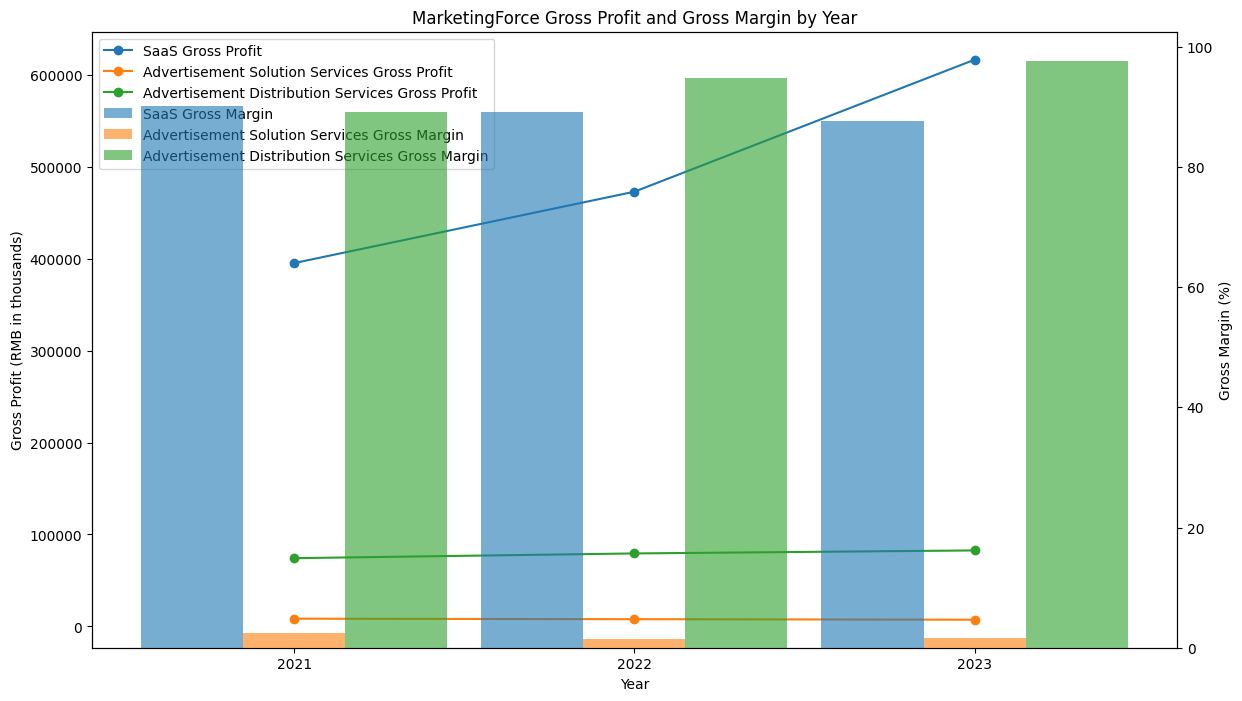

In [3]:
data = pd.read_excel('profits_breakdown.xlsx')
# Separate the data into gross profit and gross margin
gross_profit_data = data[data['Type'] == 'Gross Profit']
gross_margin_data = data[data['Type'] == 'Gross Margin']

fig, ax1 = plt.subplots(figsize=(14, 8))
colors = {'SaaS': 'tab:blue', 
            'Advertisement Solution Services': 'tab:orange', 
            'Advertisement Distribution Services': 'tab:green'}

# plot the gross profit as line graphs
for category in ['SaaS', 'Advertisement Solution Services', 'Advertisement Distribution Services']:
    ax1.plot(gross_profit_data['Year'], gross_profit_data[category], marker='o', label=category + ' Gross Profit', color=colors[category])

# plot the gross margin as bar graphs
ax2 = ax1.twinx()
width = 0.3
for i, category in enumerate(['SaaS', 'Advertisement Solution Services', 'Advertisement Distribution Services']):
    ax2.bar(gross_margin_data['Year'] + i * width - width, gross_margin_data[category], width=width, label=category + ' Gross Margin', color=colors[category], alpha=0.6)

ax1.set_xticks([2021, 2022, 2023])
ax1.set_xlabel('Year')

ax1.set_ylabel('Gross Profit (RMB in thousands)')
ax2.set_ylabel('Gross Margin (%)')

ax1.set_title('MarketingForce Gross Profit and Gross Margin by Year')

lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

plt.show()

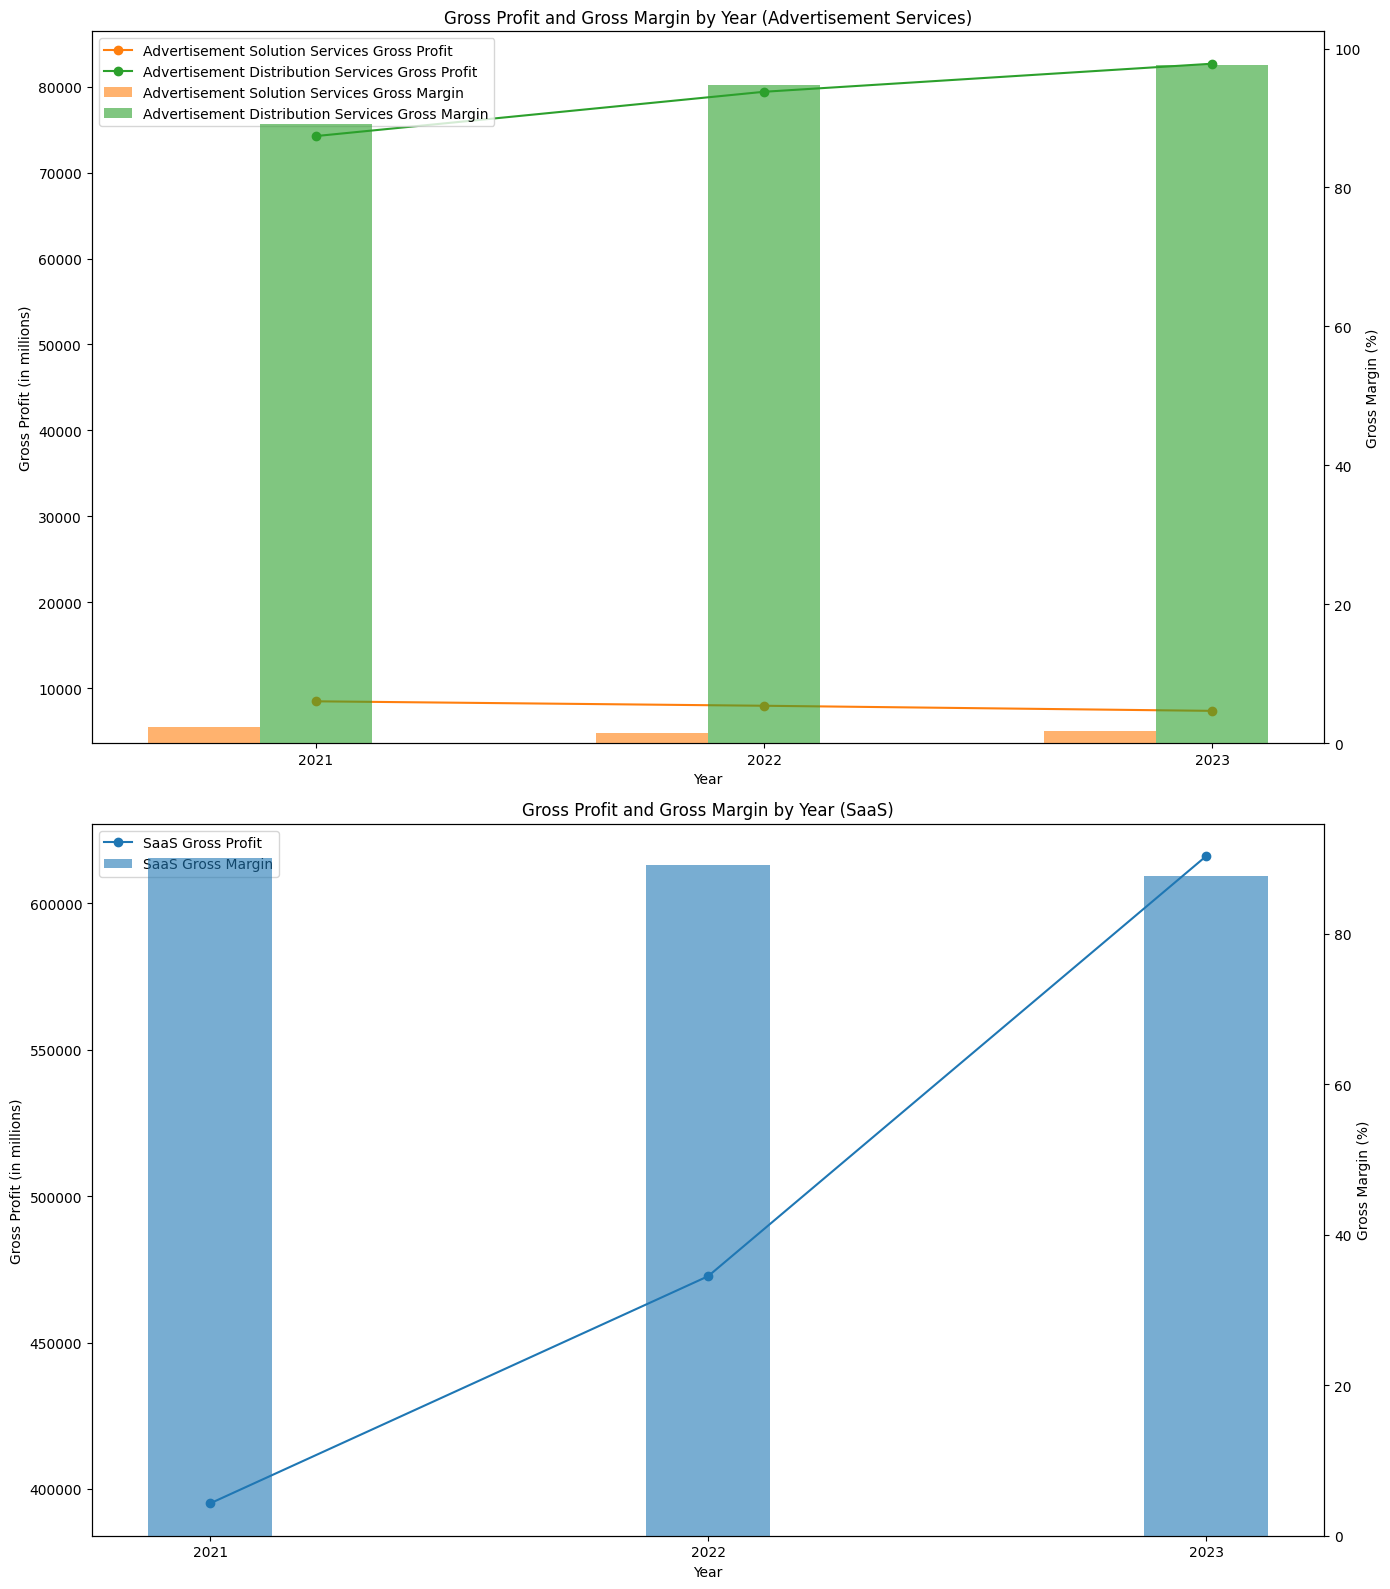

In [17]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 16))

# Colors for the categories
colors = {'SaaS': 'tab:blue', 
          'Advertisement Solution Services': 'tab:orange', 
          'Advertisement Distribution Services': 'tab:green'}

# Plot for Advertisement Solution Services and Advertisement Distribution Services
for category in ['Advertisement Solution Services', 'Advertisement Distribution Services']:
    ax1.plot(gross_profit_data['Year'], gross_profit_data[category], marker='o', label=category + ' Gross Profit', color=colors[category])

# Create a twin y-axis for the bar graph
ax2 = ax1.twinx()
width = 0.25
for i, category in enumerate(['Advertisement Solution Services', 'Advertisement Distribution Services']):
    ax2.bar(gross_margin_data['Year'] + i * width - width, gross_margin_data[category], width=width, label=category + ' Gross Margin', color=colors[category], alpha=0.6)

# Set the labels and title for the first graph
ax1.set_xlabel('Year')
ax1.set_ylabel('Gross Profit (in millions)')
ax2.set_ylabel('Gross Margin (%)')
ax1.set_title('Gross Profit and Gross Margin by Year (Advertisement Services)')
ax1.set_xticks([2021, 2022, 2023])

# Add legends for the first graph
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

# Plot for SaaS
ax3.plot(gross_profit_data['Year'], gross_profit_data['SaaS'], marker='o', label='SaaS Gross Profit', color=colors['SaaS'])

# Create a twin y-axis for the bar graph
ax4 = ax3.twinx()
ax4.bar(gross_margin_data['Year'], gross_margin_data['SaaS'], width=width, label='SaaS Gross Margin', color=colors['SaaS'], alpha=0.6)

# Set the labels and title for the second graph
ax3.set_xlabel('Year')
ax3.set_ylabel('Gross Profit (in millions)')
ax4.set_ylabel('Gross Margin (%)')
ax3.set_title('Gross Profit and Gross Margin by Year (SaaS)')
ax3.set_xticks([2021, 2022, 2023])

# Add legends for the second graph
lines, labels = ax3.get_legend_handles_labels()
bars, bar_labels = ax4.get_legend_handles_labels()
ax3.legend(lines + bars, labels + bar_labels, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


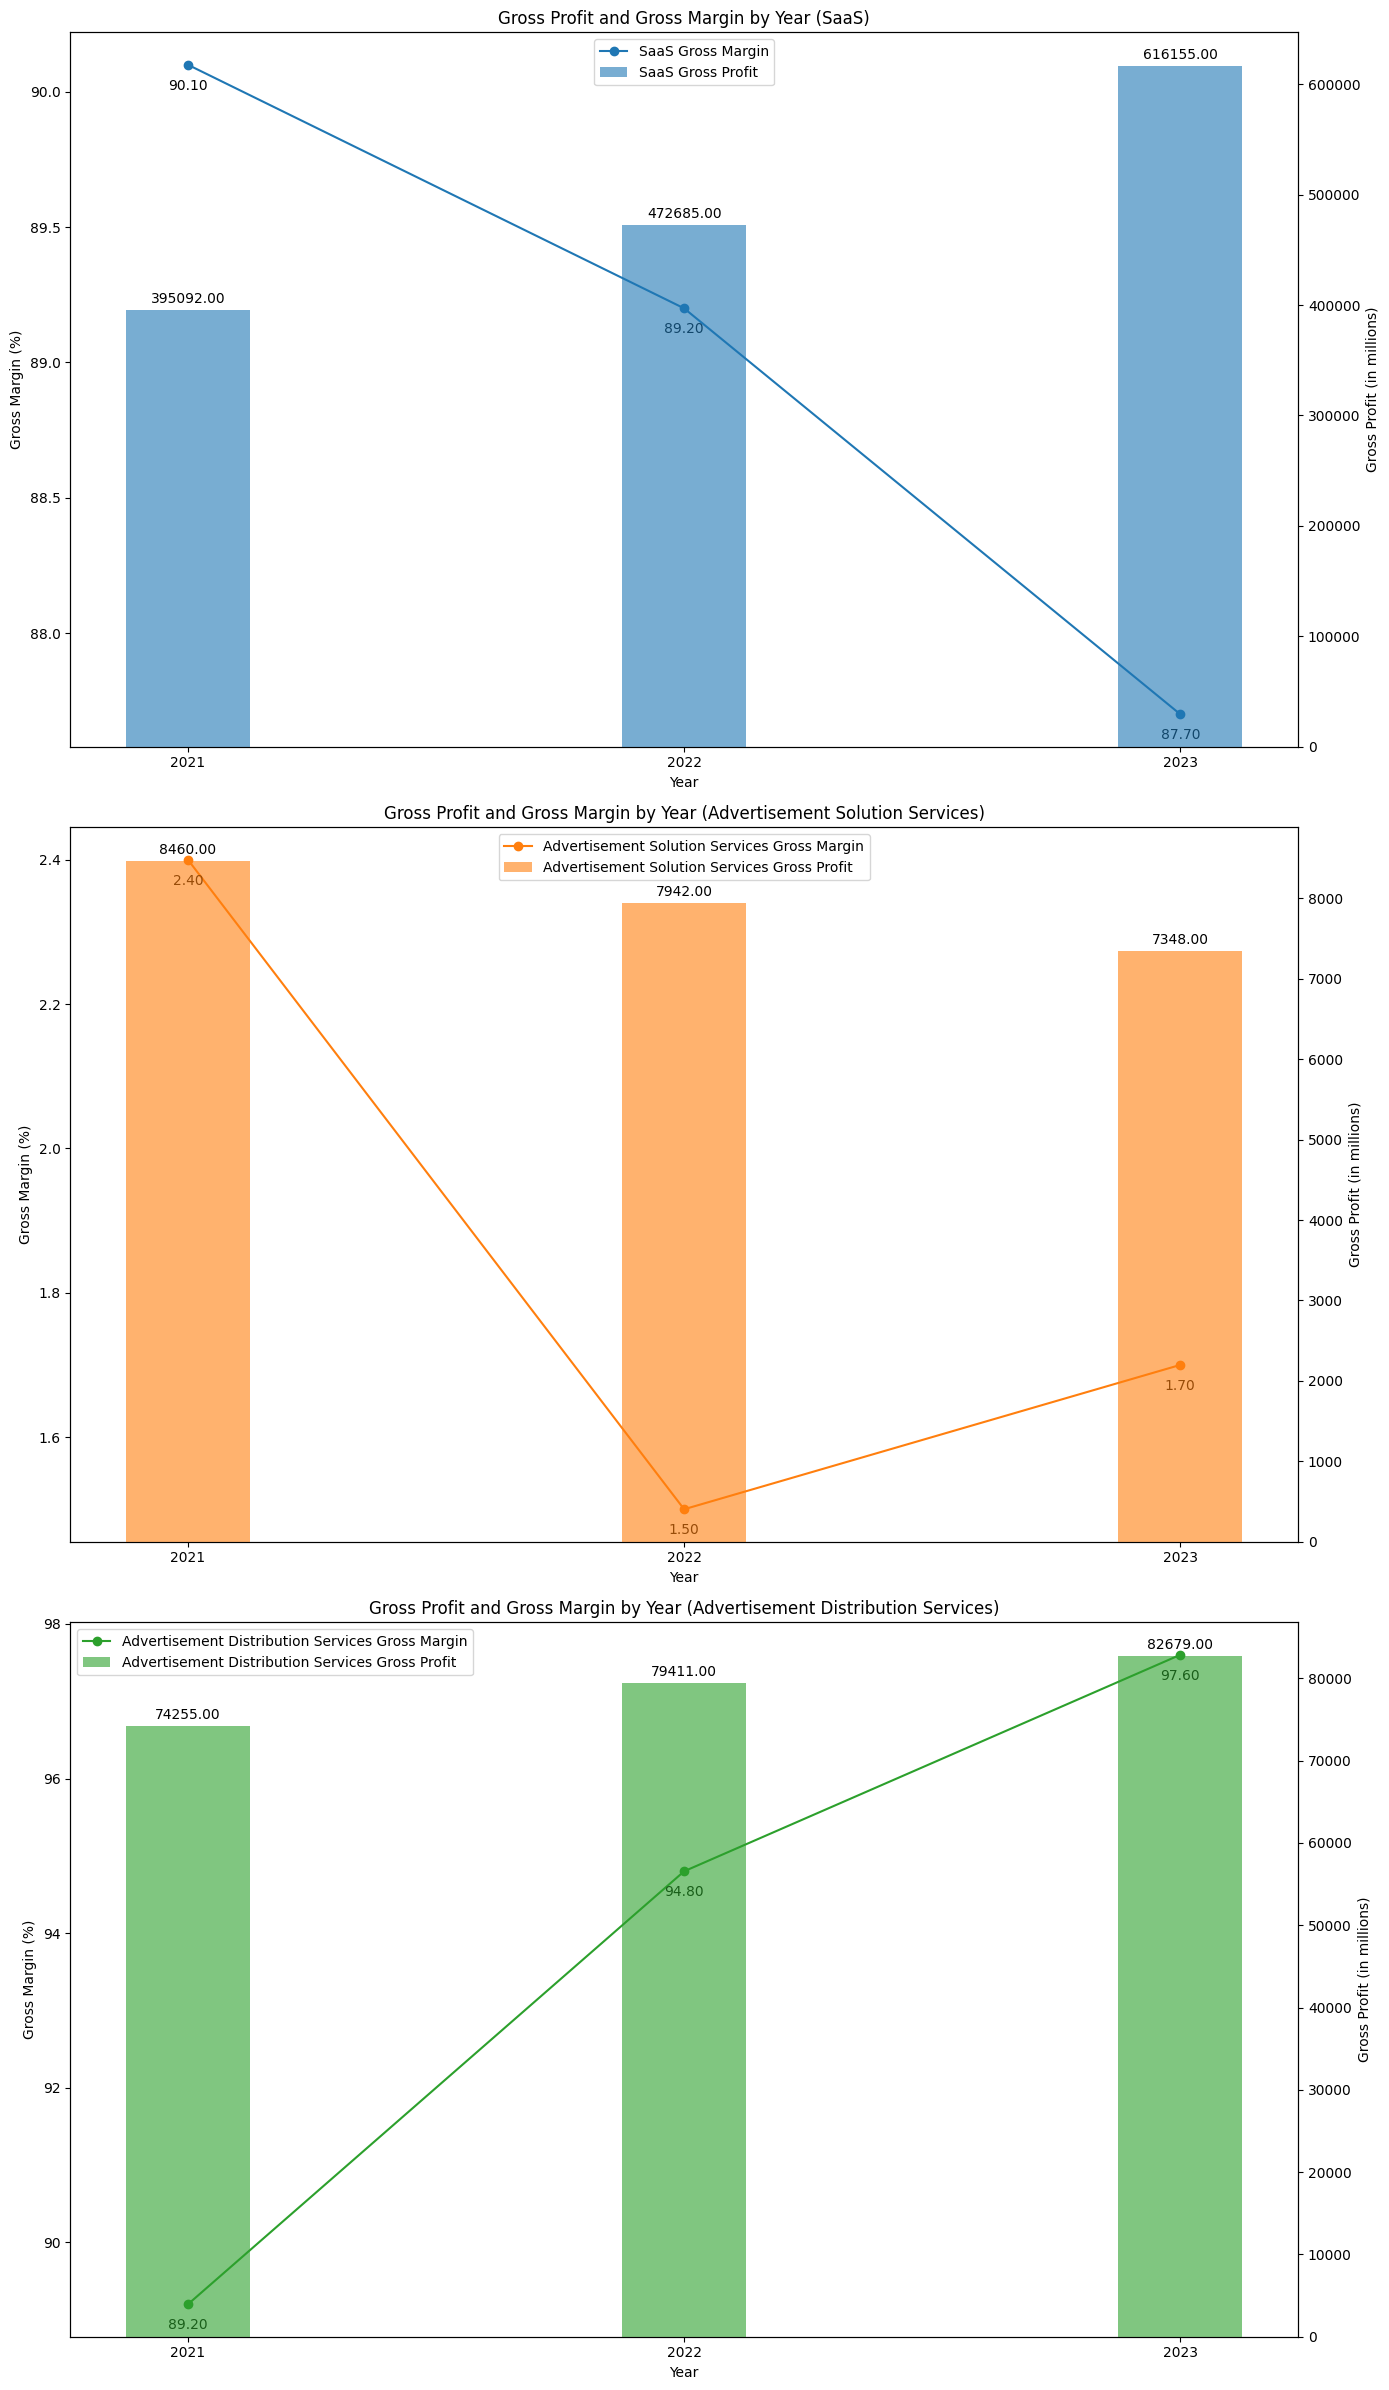

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('profits_breakdown.xlsx')

# separate data into gross profit and gross margin
gross_profit_data = data[data['Type'] == 'Gross Profit']
gross_margin_data = data[data['Type'] == 'Gross Margin']

fig, axes = plt.subplots(3, 1, figsize=(14, 24))

colors = {'SaaS': 'tab:blue', 
            'Advertisement Solution Services': 'tab:orange', 
            'Advertisement Distribution Services': 'tab:green'}
categories = ['SaaS', 'Advertisement Solution Services', 'Advertisement Distribution Services']

# create plot for each category 
for i, category in enumerate(categories):
    ax1 = axes[i]
    
    # plot the gross profit as line graphs
    ax1.plot(gross_margin_data['Year'], gross_margin_data[category], marker='o', label=category + ' Gross Margin', color=colors[category])
    for j, value in enumerate(gross_margin_data[category]):
        ax1.annotate(f'{value:.2f}', xy=(gross_margin_data['Year'].iloc[j], value), xytext=(0, -20), textcoords='offset points', ha='center', va='bottom', color='black')

    # plot the gross margin as the bar graph
    ax2 = ax1.twinx()
    width = 0.25
    data = ax2.bar(gross_profit_data['Year'], gross_profit_data[category], width=width, label=category + ' Gross Profit', color=colors[category], alpha=0.6)
    for bar in data:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Gross Margin (%)')
    ax2.set_ylabel('Gross Profit (in millions)')
    ax1.set_title(f'Gross Profit and Gross Margin by Year ({category})')
    ax1.set_xticks([2021, 2022, 2023])
    
    # add legends
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    if i == 2:
        ax1.legend(lines + bars, labels + bar_labels, loc='upper left')
    else:
        ax1.legend(lines + bars, labels + bar_labels, loc='upper center')

plt.tight_layout()
plt.show()
